# Chemistry

OpenMS has representations for various chemical concepts including
molecular formulas, isotopes, ribonucleotide and amino acid sequences as
well as common modifications of amino acids or ribonucleotides.

## Constants

OpenMS has many chemical and physical constants built in:

In [ ]:
import pyopenms.Constants

help(pyopenms.Constants)
print("Avogadro's number is", pyopenms.Constants.AVOGADRO)

which provides access to constants such as Avogadro's number or the
electron mass.

## Elements

In OpenMS, elements are stored in
[ElementDB](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.ElementDB.html)
which has entries for dozens of elements commonly used in mass
spectrometry.

In [ ]:
import pyopenms as oms

edb = oms.ElementDB()

edb.hasElement("O")
edb.hasElement("S")

oxygen = edb.getElement("O")
print(oxygen.getName())
print(oxygen.getSymbol())
print(oxygen.getMonoWeight())
print(oxygen.getAverageWeight())

sulfur = edb.getElement("S")
print(sulfur.getName())
print(sulfur.getSymbol())
print(sulfur.getMonoWeight())
print(sulfur.getAverageWeight())
isotopes = sulfur.getIsotopeDistribution()

print("One mole of oxygen weighs", 2 * oxygen.getAverageWeight(), "grams")
print("One mole of 16O2 weighs", 2 * oxygen.getMonoWeight(), "grams")

As we can see, the OpenMS
[ElementDB](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.ElementDB.html)
has entries for common elements like oxygen and sulfur as well as
information on their average and monoisotopic weight. Note that the
monoisotopic weight is the weight of the most abundant isotope while the
average weight is the sum across all isotopes, weighted by their natural
abundance. Therefore, one mole of oxygen (`O2`) weighs slightly more
than a mole of only its monoisotopic isotope since natural oxygen is a
mixture of multiple isotopes.

``` output
Oxygen
O
15.994915
15.999405323160001
Sulfur
S
31.97207073
32.066084735289
One mole of oxygen weighs 31.998810646320003 grams
One mole of 16O2 weighs 31.98983 grams
```

### Isotopes

We can also inspect the full isotopic distribution of oxygen and sulfur:

In [ ]:
edb = oms.ElementDB()
oxygen_isoDist = {"mass": [], "abundance": []}
sulfur_isoDist = {"mass": [], "abundance": []}

oxygen = edb.getElement("O")
isotopes = oxygen.getIsotopeDistribution()
for iso in isotopes.getContainer():
    print(
        "Oxygen isotope",
        iso.getMZ(),
        "has abundance",
        iso.getIntensity() * 100,
        "%",
    )
    oxygen_isoDist["mass"].append(iso.getMZ())
    oxygen_isoDist["abundance"].append((iso.getIntensity() * 100))

sulfur = edb.getElement("S")
isotopes = sulfur.getIsotopeDistribution()
for iso in isotopes.getContainer():
    print(
        "Sulfur isotope",
        iso.getMZ(),
        "has abundance",
        iso.getIntensity() * 100,
        "%",
    )
    sulfur_isoDist["mass"].append(iso.getMZ())
    sulfur_isoDist["abundance"].append((iso.getIntensity() * 100))

OpenMS can compute isotopic distributions for individual elements which
contain information for all stable elements. The current values in the
file are average abundances found in nature, which may differ depending
on location. The above code outputs the isotopes of oxygen and sulfur as
well as their abundance:

``` output
Oxygen isotope 15.994915 has abundance 99.75699782371521 %
Oxygen isotope 16.999132 has abundance 0.03800000122282654 %
Oxygen isotope 17.999169 has abundance 0.20500000100582838 %

Sulfur isotope 31.97207073 has abundance 94.92999911308289 %
Sulfur isotope 32.971458 has abundance 0.7600000128149986 %
Sulfur isotope 33.967867 has abundance 4.2899999767541885 %
Sulfur isotope 35.967081 has abundance 0.019999999494757503 %
```

The isotope distribution of oxygen and sulfur can be displayed with the
following extra code:

In [ ]:
import math
from matplotlib import pyplot as plt


# very simple overlappping correction of annotations
def adjustText(x1, y1, x2, y2):
    if y1 > y2:
        plt.annotate(
            "%0.3f" % (y2),
            xy=(x2, y2),
            xytext=(x2 + 0.5, y2 + 9),
            textcoords="data",
            arrowprops=dict(arrowstyle="->", color="r", lw=0.5),
            horizontalalignment="right",
            verticalalignment="top",
        )
    else:
        plt.annotate(
            "%0.3f" % (y1),
            xy=(x1, y1),
            xytext=(x1 + 0.5, y1 + 9),
            textcoords="data",
            arrowprops=dict(arrowstyle="->", color="r", lw=0.5),
            horizontalalignment="right",
            verticalalignment="top",
        )


def plotDistribution(distribution):
    n = len(distribution["mass"])
    for i in range(0, n):
        plt.vlines(
            x=distribution["mass"][i], ymin=0, ymax=distribution["abundance"][i]
        )
        if (
            int(distribution["mass"][i - 1]) == int(distribution["mass"][i])
            and i != 0
        ):
            adjustText(
                distribution["mass"][i - 1],
                distribution["abundance"][i - 1],
                distribution["mass"][i],
                distribution["abundance"][i],
            )
        else:
            plt.text(
                x=distribution["mass"][i],
                y=(distribution["abundance"][i] + 2),
                s="%0.3f" % (distribution["abundance"][i]),
                va="center",
                ha="center",
            )
    plt.ylim([0, 110])
    plt.xticks(
        range(
            math.ceil(distribution["mass"][0]) - 2,
            math.ceil(distribution["mass"][-1]) + 2,
        )
    )


plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Isotopic distribution of oxygen")
plotDistribution(oxygen_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.subplot(1, 2, 2)
plt.title("Isotopic distribution of sulfur")
plotDistribution(sulfur_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.show()

which produces

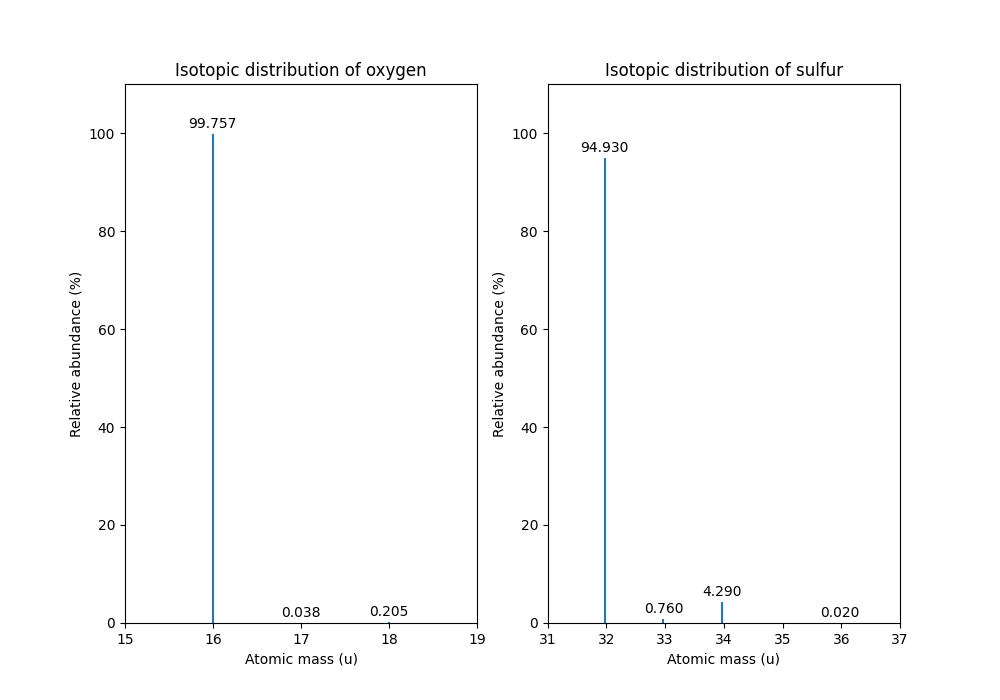

### Mass Defect

<div style="background-color: #BDE5F8; margin: 10px 0px; padding:12px;"><p style="font-size: x-large"><i class="far fa-sticky-note"></i> <b>Note</b></p>

While all isotopes are created by adding one or more neutrons to the
nucleus, this leads to different observed masses due to the [mass
defect](https://en.wikipedia.org/wiki/Nuclear_binding_energy#Mass_defect),
which describes the difference between the mass of an atom and the mass
of its constituent particles. For example, the mass difference between
`^{12}C` and `^{13}C` is slightly different than the mass difference
between `^{14}N` and `^{15}N`, even though both only differ by a neutron
from their monoisotopic element:

``` code
edb = oms.ElementDB()
isotopes = edb.getElement("C").getIsotopeDistribution().getContainer()
carbon_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()
isotopes = edb.getElement("N").getIsotopeDistribution().getContainer()
nitrogen_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()

print("Mass difference between 12C and 13C:", carbon_isotope_difference)
print("Mass difference between 14N and N15:", nitrogen_isotope_difference)
print(
    "Relative deviation:",
    100
    * (carbon_isotope_difference - nitrogen_isotope_difference)
    / carbon_isotope_difference,
    "%",
)
```

``` output
Mass difference between 12C and 13C: 1.003355
Mass difference between 14N and 15N: 0.997035
Relative deviation: 0.6298867300208343 %
```

</div>

This difference can actually be measured by a high resolution mass
spectrometry instrument and is used in the [tandem mass tag
(TMT)](https://en.wikipedia.org/wiki/Tandem_mass_tag) labelling
strategy.

For the same reason, the helium atom has a slightly lower mass than the
mass of its constituent particles (two protons, two neutrons and two
electrons):

> ``` code
> from pyopenms.Constants import PROTON_MASS_U, ELECTRON_MASS_U, NEUTRON_MASS_U
>
> helium = oms.ElementDB().getElement("He")
> isotopes = helium.getIsotopeDistribution()
>
> mass_sum = 2 * PROTON_MASS_U + 2 * ELECTRON_MASS_U + 2 * NEUTRON_MASS_U
> helium4 = isotopes.getContainer()[1].getMZ()
> print("Sum of masses of 2 protons, neutrons and electrons:", mass_sum)
> print("Mass of He4:", helium4)
> print(
>     "Difference between the two masses:",
>     100 * (mass_sum - helium4) / mass_sum,
>     "%",
> )
> ```
>
> ``` output
> Sum of masses of 2 protons, neutrons and electrons: 4.032979924670597
> Mass of He4: 4.00260325415
> Difference between the two masses: 0.7532065888743016 %
> ```
>
> The difference in mass is the energy released when the atom was formed
> (or in other words, it is the energy required to disassemble the
> nucleus into its particles).

## Molecular Formulas

Elements can be combined to molecular formulas
([EmpiricalFormula](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.EmpiricalFormula.html))
which can be used to describe molecules such as metabolites, amino acid
sequences or oligonucleotides. The class supports a large number of
operations like addition and subtraction. A simple example is given in
the next few lines of code.

In [ ]:
methanol = oms.EmpiricalFormula("CH3OH")
water = oms.EmpiricalFormula("H2O")
ethanol = oms.EmpiricalFormula("CH2") + methanol
print("Ethanol chemical formula:", ethanol.toString())
print("Ethanol composition:", ethanol.getElementalComposition())
print("Ethanol has", ethanol.getElementalComposition()[b"H"], "hydrogen atoms")

which produces

``` output
Ethanol chemical formula: C2H6O1
Ethanol composition: {b'C': 2, b'H': 6, b'O': 1}
Ethanol has 6 hydrogen atoms
```

Note how in line 5 we were able to make a new molecule by adding
existing molecules (for example by adding two
[EmpiricalFormula](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.EmpiricalFormula.html)
objects). In this case, we illustrated how to make ethanol by adding a
`CH2` methyl group to an existing methanol molecule. Note that OpenMS
describes sum formulas with the
[EmpiricalFormula](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.EmpiricalFormula.html)
object and does store structural information in this class.

### Isotopes

Specific isotopes can be incorporated into a molecular formula using
bracket notation. For example, ethanol with one or two `C13` can be
specified using `(13)C` as follows:

In [ ]:
ethanol = oms.EmpiricalFormula("C2H6O")
print("Ethanol chemical formula:", ethanol.toString())
print("Ethanol composition:", ethanol.getElementalComposition())
print("Ethanol weight:", ethanol.getMonoWeight())

ethanol = oms.EmpiricalFormula("(13)C1CH6O")
print("Ethanol chemical formula:", ethanol.toString())
print("Ethanol composition:", ethanol.getElementalComposition())
print("Ethanol weight:", ethanol.getMonoWeight())

ethanol = oms.EmpiricalFormula("(13)C2H6O")
print("Ethanol chemical formula:", ethanol.toString())
print("Ethanol composition:", ethanol.getElementalComposition())
print("Ethanol weight:", ethanol.getMonoWeight())

which produces

``` output
Ethanol chemical formula: C2H6O1
Ethanol composition: {b'C': 2, b'H': 6, b'O': 1}
Ethanol weight: 46.0418651914

Ethanol chemical formula: (13)C1C1H6O1
Ethanol composition: {b'(13)C': 1, b'C': 1, b'H': 6, b'O': 1}
Ethanol weight: 47.0452201914

Ethanol chemical formula: (13)C2H6O1
Ethanol composition: {b'(13)C': 2, b'H': 6, b'O': 1}
Ethanol weight: 48.0485751914
```

### Isotopic Distributions

OpenMS can also generate theoretical isotopic distributions from
analytes represented as
[EmpiricalFormula](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.EmpiricalFormula.html).
Currently there are two algorithms implemented,
[CoarseIsotopePatternGenerator](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.CoarseIsotopePatternGenerator.html)
which produces unit mass isotope patterns and
[FineIsotopePatternGenerator](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FineIsotopePatternGenerator.html)
which is based on the IsoSpec algorithm[1] :

[1] Łącki MK, Startek M, Valkenborg D, Gambin A. IsoSpec: Hyperfast Fine
Structure Calculator. Anal Chem. 2017 Mar 21;89(6):3272-3277. [doi:
10.1021/acs.analchem.6b01459.](http://doi.org/10.1021/acs.analchem.6b01459)

In [ ]:
methanol = oms.EmpiricalFormula("CH3OH")
ethanol = oms.EmpiricalFormula("CH2") + methanol

methanol_isoDist = {"mass": [], "abundance": []}
ethanol_isoDist = {"mass": [], "abundance": []}

print("Coarse Isotope Distribution:")
isotopes = ethanol.getIsotopeDistribution(oms.CoarseIsotopePatternGenerator(4))
prob_sum = sum([iso.getIntensity() for iso in isotopes.getContainer()])
print("This covers", prob_sum, "probability")
for iso in isotopes.getContainer():
    print(
        "Isotope", iso.getMZ(), "has abundance", iso.getIntensity() * 100, "%"
    )
    methanol_isoDist["mass"].append(iso.getMZ())
    methanol_isoDist["abundance"].append((iso.getIntensity() * 100))

print("Fine Isotope Distribution:")
isotopes = ethanol.getIsotopeDistribution(oms.FineIsotopePatternGenerator(1e-3))
prob_sum = sum([iso.getIntensity() for iso in isotopes.getContainer()])
print("This covers", prob_sum, "probability")
for iso in isotopes.getContainer():
    print(
        "Isotope", iso.getMZ(), "has abundance", iso.getIntensity() * 100, "%"
    )
    ethanol_isoDist["mass"].append(iso.getMZ())
    ethanol_isoDist["abundance"].append((iso.getIntensity() * 100))

which produces

``` output
Coarse Isotope Distribution:
This covers 0.9999999753596569 probability
Isotope 46.0418651914 has abundance 97.56630063056946 %
Isotope 47.045220029199996 has abundance 2.21499539911747 %
Isotope 48.048574867 has abundance 0.2142168115824461 %
Isotope 49.0519297048 has abundance 0.004488634294830263 %

Fine Isotope Distribution:
This covers 0.9994461630121805 probability
Isotope 46.0418651914 has abundance 97.5662887096405 %
Isotope 47.0452201914 has abundance 2.110501006245613 %
Isotope 47.0481419395 has abundance 0.06732848123647273 %
Isotope 48.046119191399995 has abundance 0.20049810409545898 %
```

Together with the `plotDistribution()` function from above and the extra
code:

In [ ]:
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Isotopic distribution of methanol")
plotDistribution(methanol_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.subplot(1, 2, 2)
plt.title("Isotopic distribution of ethanol")
plotDistribution(ethanol_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.savefig("methanol_ethanol_isoDistribution.png")

we can produce the following visualization

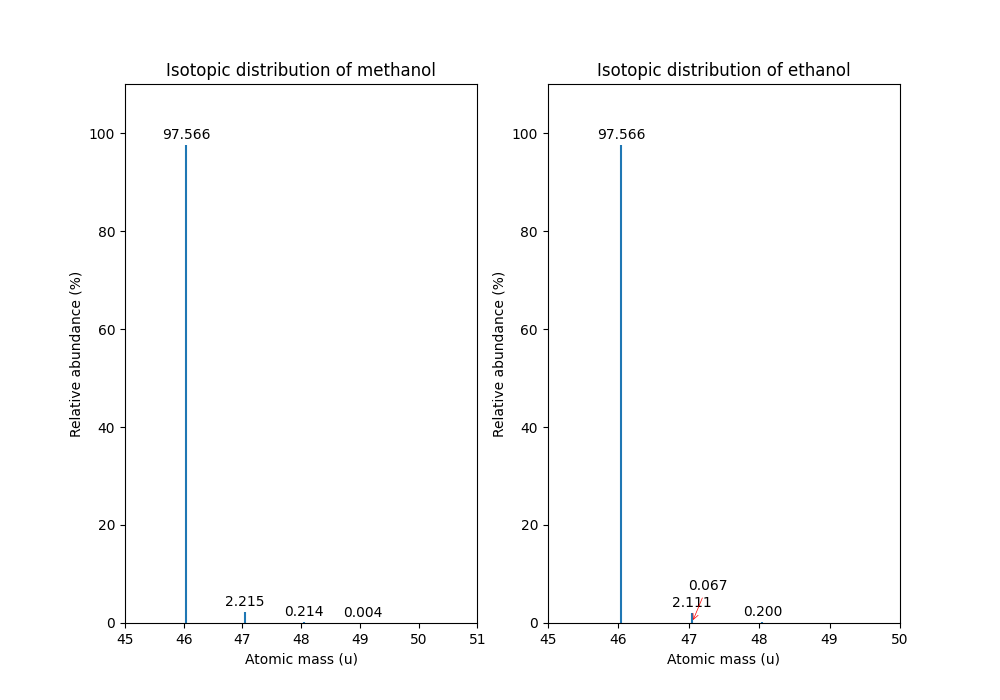

The result calculated with the
[FineIsotopePatternGenerator](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FineIsotopePatternGenerator.html)
contains the hyperfine isotope structure with heavy isotopes of Carbon
and Hydrogen clearly distinguished while the coarse (unit resolution)
isotopic distribution contains summed probabilities for each isotopic
peak without the hyperfine resolution.

Please refer to our previous discussion on the [mass
defect](#Mass-Defect) to understand the results of the hyperfine
algorithm and why different elements produce slightly different masses.
In this example, the hyperfine isotopic distribution will contain two
peaks for the nominal mass of $47$: one at $47.045$ for the
incorporation of one heavy $13C$ with a delta mass of $1.003355$ and one
at $47.048$ for the incorporation of one heavy deuterium with a delta
mass of $1.006277$. These two peaks also have two different abundances
(the heavy carbon one has $2.1%$ abundance and the deuterium one has
$0.07%$ abundance). This can be understood given that there are 2 `C`
atoms and the natural abundance of `13C` is about $1.1%$, while the
molecule has `6H` atoms and the natural abundance of deuterium is about
$0.02%$. The fine isotopic generator will not generate the peak at
nominal mass $49$ since we specified our cutoff at $0.1%$ total
abundance and the four peaks above cover $99.9%$ of the isotopic
abundance.

We can also decrease our cutoff and ask for more isotopes to be
calculated:

In [ ]:
methanol = oms.EmpiricalFormula("CH3OH")
ethanol = oms.EmpiricalFormula("CH2") + methanol

print("Fine Isotope Distribution:")
isotopes = ethanol.getIsotopeDistribution(oms.FineIsotopePatternGenerator(1e-6))
prob_sum = sum([iso.getIntensity() for iso in isotopes.getContainer()])
print("This covers", prob_sum, "probability")
for iso in isotopes.getContainer():
    print(
        "Isotope", iso.getMZ(), "has abundance", iso.getIntensity() * 100, "%"
    )

which produces

``` output
Fine Isotope Distribution:
This covers 0.9999993089130612 probability
Isotope 46.0418651914 has abundance 97.5662887096405 %
Isotope 47.0452201914 has abundance 2.110501006245613 %
Isotope 47.046082191400004 has abundance 0.03716550418175757 %
Isotope 47.0481419395 has abundance 0.06732848123647273 %
Isotope 48.046119191399995 has abundance 0.20049810409545898 %
Isotope 48.0485751914 has abundance 0.011413302854634821 %
Isotope 48.0494371914 has abundance 0.0008039440217544325 %
Isotope 48.0514969395 has abundance 0.0014564131561201066 %
Isotope 49.049474191399995 has abundance 0.004337066275184043 %
Isotope 49.0523959395 has abundance 0.00013835959862262825 %
```

Here we can observe more peaks and now also see the heavy oxygen peak at
$47.04608$ with a delta mass of $1.004217$ (difference between $16O$ and
$17O$) at an abundance of $0.04%$, which is what we would expect for a
single `O` atom. Even though the natural abundance of deuterium
($0.02%$) is lower than $17O$ ($0.04%$), since there are `6H` atoms in
the molecule and only one `O`, it is more likely that we will see a
deuterium peak than a heavy oxygen peak. Also, even for a small molecule
like ethanol, the differences in mass between the hyperfine peaks can
reach more than $110$ ppm ($48.046$ vs $48.051$). Note that the
[FineIsotopePatternGenerator](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FineIsotopePatternGenerator.html)
will generate peaks until the total error has decreased to $1e^{-6}$,
allowing us to cover $0.999999$ of the probability.

OpenMS can also produce isotopic distribution with masses rounded to the
nearest integer:

In [ ]:
isotopes = ethanol.getIsotopeDistribution(
    oms.CoarseIsotopePatternGenerator(5, True)
)
for iso in isotopes.getContainer():
    print(
        "Isotope", iso.getMZ(), "has abundance", iso.getIntensity() * 100, "%"
    )

``` output
Isotope 46.0 has abundance 97.56627082824707 %
Isotope 47.0 has abundance 2.214994840323925 %
Isotope 48.0 has abundance 0.214216741733253 %
Isotope 49.0 has abundance 0.0044886332034366205 %
Isotope 50.0 has abundance 2.64924580051229e-05 %
```

## Amino Acids

An amino acid residue is represented in OpenMS by the class
[Residue](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.Residue.html).
It provides a container for the amino acids as well as some
functionality. The class is able to provide information such as the
isotope distribution of the residue, the average and monoisotopic
weight. The residues can be identified by their full name, their three
letter abbreviation or the single letter abbreviation. The residue can
also be modified, which is implemented in the
[Modification](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.Modification.html)
class. Additional less frequently used parameters of a residue like the
gas-phase basicity and pk values are also available.

In [ ]:
lys = oms.ResidueDB().getResidue("Lysine")
print(lys.getName())
print(lys.getThreeLetterCode())
print(lys.getOneLetterCode())
print(lys.getAverageWeight())
print(lys.getMonoWeight())
print(lys.getPka())
print(lys.getFormula().toString())

``` output
'Lysine'
'LYS'
'K'
146.18788276708443
146.1055284466
2.16
u'C6H14N2O2'
```

As we can see, OpenMS knows common amino acids like lysine as well as
some properties of them. These values are stored in `Residues.xml` in
the OpenMS share folder and can, in principle, be modified.

## Amino Acid Modifications

An amino acid residue modification is represented in OpenMS by the class
[ResidueModification](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.ResidueModification.html).
The known modifications are stored in the
[ModificationsDB](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.ModificationsDB.html)
object, which is capable of retrieving specific modifications. It
contains UniMod as well as PSI modifications.

In [ ]:
ox = oms.ModificationsDB().getModification("Oxidation")
print(ox.getUniModAccession())
print(ox.getUniModRecordId())
print(ox.getDiffMonoMass())
print(ox.getId())
print(ox.getFullId())
print(ox.getFullName())
print(ox.getDiffFormula())

``` output
UniMod:35
35
15.994915
Oxidation
Oxidation (N)
Oxidation or Hydroxylation
O1
```

thus providing information about the "Oxidation" modification. As above,
we can investigate the isotopic distribution of the modification (which
in this case is identical to the one of Oxygen by itself):

In [ ]:
isotopes = ox.getDiffFormula().getIsotopeDistribution(
    oms.CoarseIsotopePatternGenerator(5)
)
for iso in isotopes.getContainer():
    print(iso.getMZ(), ":", iso.getIntensity())

Which will print the isotopic pattern of the modification (Oxygen):

``` output
15.994915 : 0.9975699782371521
16.998269837800002 : 0.0003800000122282654
18.0016246756 : 0.002050000010058284
```

All available modifications can be stored in a Dictionary by:

In [ ]:
num_mod = oms.ModificationsDB().getNumberOfModifications()

all_mods = {}
for index in range(0, num_mod):
    mod = oms.ModificationsDB().getModification(index)
    all_mods[mod.getUniModRecordId()] = mod

And the modification can be accessed by UniMod Accesstion by:

In [ ]:
# obtain modification with UniMod Accession 122
ox = all_mods[122]

print(ox.getUniModAccession())
print(ox.getUniModRecordId())
print(ox.getDiffMonoMass())
print(ox.getId())
print(ox.getFullId())
print(ox.getFullName())
print(ox.getDiffFormula())

to output:

``` output
UniMod:122
122
27.994915
Formyl
Formyl (S)
Formylation
C1O1
```

## Ribonucleotides

A [ribonucleotide](https://en.wikipedia.org/wiki/Ribonucleotide)
describes one of the building blocks of DNA and RNA. In OpenMS, a
ribonucleotide in its modified or unmodified form is represented by the
[Ribonucleotide](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.Ribonucleotide.html)
class in OpenMS. The class is able to provide information such as the
isotope distribution of the residue, the average and monoisotopic
weight. The residues can be identified by their full name, their three
letter abbreviation or the single letter abbreviation. Modified
ribonucleotides are represented by the same class. Currently, support
for RNA is implemented.

In [ ]:
uridine = oms.RibonucleotideDB().getRibonucleotide(b"U")
print(uridine.getName())
print(uridine.getCode())
print(uridine.getAvgMass())
print(uridine.getMonoMass())
print(uridine.getFormula().toString())
print(uridine.isModified())
methyladenosine = oms.RibonucleotideDB().getRibonucleotide(b"m1A")
print(methyladenosine.getName())
print(methyladenosine.isModified())

``` output
'uridine'
'U'
244.2043
244.0695
'C9H12N2O6'
False
'1-methyladenosine'
True
```